# Name: Lokesh Bhirud

## Task 1 : Simple Linear Regression model using 1 independent variable only.



Basically a linear regression model using one variable is of the form h_x= mx+c where h_x is popularly known as the hypothesis, m is the coefficient or slope, x is the independent variable and c is the intercept. One way to do this on python is using sklearn which makes model building a one step process and another is to calculate the optimum theta values manually and build the model by creating functions. We will see both here.



### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In this we will check the characteristics of the sample, its distribution, missing values, ouliers, and will try to build hypothetical analysis for the same.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- No null values in the dataset.

In [4]:
df.shape

(25, 2)

25 rows and 2 columns in the dataset.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- Hours has a standard deviation of 2.52 around the mean 5.01
- Scores has a standard deviation of 25.2 around the mean 51.48

From the quartiles we can also analyse that there is no any student increase in the values from min to 25% quantile and 75% quantile to max which suggests the absence of the outliers.

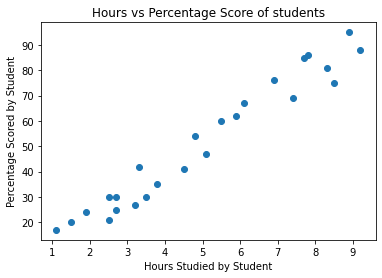

In [6]:
# Scatterplot for hours vs Percentage score of students
plt.plot(df.Hours, df.Scores, marker = "o", ls = '')
plt.xlabel("Hours Studied by Student")
plt.ylabel("Percentage Scored by Student")
plt.title("Hours vs Percentage Score of students")
plt.show()

Checking an overview of whether there is even a correlation between the two variables or not. Note that this only shows that there is a cause and effect relationship but does not determine the causation.

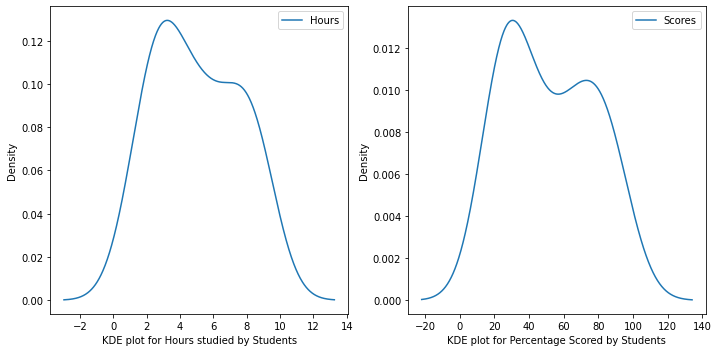

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_xlabel("KDE plot for Hours studied by Students")
ax[1].set_xlabel("KDE plot for Percentage Scored by Students")
df.plot(kind='kde',y='Hours',ax=ax[0])
df.plot(kind='kde',y='Scores',ax=ax[1])
f.tight_layout()

From graphically we have seen that the sample is equally distributed.

## Hypothesis Test

#### Shapiro-Wilk Test for Normal Distribution

<b> Null Hypothesis</b> - The sample is not significant deviated from normal distribution.

<b> Alternate Hypothesis</b> - The sample is significant deviated from normal distribution.

In [8]:
import scipy.stats as stats
stat, p = stats.shapiro(df.Hours)

In [9]:
stats, pvalue = stats.shapiro(df.Hours)
if pvalue < 0.05:
    print("The sample is not normally distributed.")
else:
    print("The sample is normally distributed.")

The sample is normally distributed.


From the above analysis, we get test statistic as 0.940 and the pvalue of 0.149 for the sample of "No of Hours studied by the student."


In [10]:
X = df[["Hours"]]
y = df.Scores.values

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [9.77580339]
Intercept: 2.483673405373196
R^2 score: 0.9529481969048356


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [14]:
print("Train score: ",lin_reg.score(X_train, y_train))
print("Test score: ",lin_reg.score(X_test, y_test))

Train score:  0.9496868783142939
Test score:  0.9420584734434517


In [15]:
y_prediction=lin_reg.predict(X_test)
y_prediction=pd.DataFrame(y_prediction)
y_prediction

,0
0,11.029003
1,25.628017
2,19.371297
3,95.494730
4,71.510634
5,27.713591
6,88.195222
7,25.628017


#### Now comparing the actual values to the model predicted values. I have displayed all of the test values here because of the size of the dataset. In cases of huge datasets, you can choose to display the first n rows or represent it on a bar graph

In [16]:
y_test=pd.DataFrame(y_test, columns = ['Scores'])

In [17]:
Compare=pd.concat([y_test['Scores'],y_prediction],axis=1).rename(columns={'Scores':'Actual',0:'Predicted'})
Compare

,Actual,Predicted
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


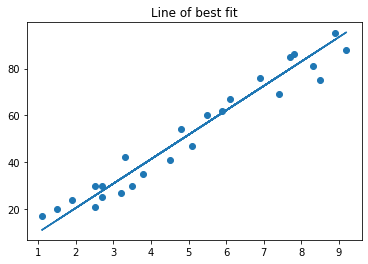

In [18]:
plt.figure
plt.scatter(X,y)
plt.plot(X,(lin_reg.coef_[0]*X+ lin_reg.intercept_))
plt.title('Line of best fit')
plt.show()

In [19]:
question=np.array(9.25)
solution= lin_reg.predict(question.reshape(1,-1))
print('The predicted score as per the model for a student studying 9.25 hours per day is = ',solution[0].round(),'approximately')

The predicted score as per the model for a student studying 9.25 hours per day is =  96.0 approximately


-----

# Prediction using simple linear regression without sklearn
Baiscally involves calculation of optimum theta using gradient descent,calculation of cost using cost function and calculation of hypothesis for value X.

We first convert the dataframes into matrices for the sake of vectorization and perform all necessary calculations among vectors. This skips the use of loops. The only place a while loop is used is for gradient descent because we have to run the formula under n number of iterations to attain global minimum.

We add a column of ones to X train because our count of theta is always m+1 for m features. We start with theta 0 insread of theta 1 for calculation of intercept.

In [20]:
X1=X_train.values.reshape(-1,1)
ones= np.ones([X1.shape[0],1])
X1= np.concatenate([ones,X1],1)
y1=y_train.reshape(-1,1)

## Hypothesis Function

In [21]:
def h_x(theta, X1):
    return theta[0][0]+ theta[0][1]* X1

## Cost Function

In [22]:
def J_cost(theta, X1, y1 ):
    return 1/(2*m) * np.sum( (X1@ np.transpose(theta) - (y1))**2)

## Gradient Descent Function 

In [23]:
m= len(X1)

def gradient_descent(theta, X1, y1, num_iter, alpha):
    
    cost= []
    i=0
    
    while i< num_iter:
        hx= h_x(theta, X1)
       
        theta -= (alpha/m) * np.sum((X1 @ np.transpose(theta) -y1)* X1, axis=0)[1]
        cost.append(J_cost(theta, X1, y1))
        
        i+=1
        
        return (theta, cost)

## Prediction Function

In [24]:
def predict(theta, X1, y1, num_iter, alpha):
    
    theta, cost= gradient_descent(theta, X1, y1, num_iter, alpha)
    
    return h_x(theta, X1), cost, theta

#### Enter parameters with a calculated guess
The alpha and number of itereations and the initial theta value can be experimented and played around with till it suits the data and the line of best fit can be obtained.

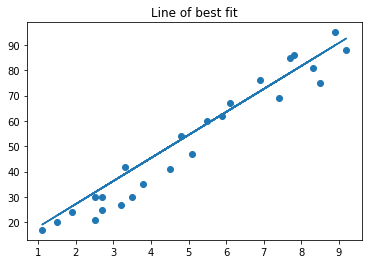

In [25]:
theta=[[0,0]]
num_iter=1000
alpha= 0.027
y_predict, cost, theta= predict(theta, X1, y1, num_iter, alpha)

plt.figure
plt.scatter(X,y)
plt.plot(X,theta[0][0]+theta[0][1]*X)
plt.title('Line of best fit')
plt.show()

### Final prediction as per the question, hours of study= 9.25

In [26]:
final_score= h_x(theta,9.25)
print('The predicted score as per the model for a student studying 9.25 hours per day is = ',final_score.round(),'approximately')

The predicted score as per the model for a student studying 9.25 hours per day is =  93.0 approximately


In [28]:
## Raw OLS Model
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        23:06:57   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scores = 9.7758 * Hours + 2.4837

---------------